In [82]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

rootFolder = "/home/giangtm/Work/Projects/DataScience/dataset/"
d= pd.read_csv(rootFolder + "Project_Planning.csv")
# d.drop(['project_Id'], axis=1, inplace=True)
d.sort_values(['project_type', 'project_name', 'step'], ascending=[False, True, True], inplace=True)
d.rename(columns={'real_speed': 'speed'}, inplace=True)
d.head(n=20)

,project_Id,project_name,project_type,step,backlog,speed,need_times,need_ftes
5,59b783fafc13ae2b40000451,001_140102_Ancestry_42882_Texas,Type_Proof,Rework,1029,179.06,184253,6.17
6,59b783fafc13ae2b40000452,001_160108_Ancestry_45741_Lutheran_Bayern3,Type_Proof,Classify,1644,149.08,245088,8.20
8,59b783fafc13ae2b40000454,001_170106_Ancestry_47392_EN_UPDATE_RoyalNavy,Type_Proof,QC,991,224.46,222440,7.44
13,59b783fafc13ae2b40000459,002_130103_SAGA_504510,Type_Proof,Classify,1241,110.66,137329,4.60
14,59b783fafc13ae2b4000045a,002_140102_Ancestry_41548_NARA,Type_Proof,Classify,1386,244.70,339154,11.35
16,59b783fafc13ae2b4000045c,002_160108_Ancestry_45803_Lutheran_Brandenburg5,Type_Proof,Rework,935,321.45,300556,10.06
18,59b783fafc13ae2b4000045e,002_170106_Ancestry_47291_EN_Nebraska_M,Type_Proof,QC,637,249.81,159129,5.33
21,59b783fafc13ae2b40000461,003_050811_SAGA_503112,Type_Proof,Classify,1631,250.60,408729,13.68
30,59b783fafc13ae2b4000046a,003_160111_Ancestry_45262_DE_Ebersberg,Type_Proof,Classify,528,186.91,98688,3.30
33,59b783fafc13ae2b4000046d,003_170106_Ancestry_44861_EN_Presbyterian_R,Type_Proof,Classify,1518,72.60,110207,3.69


In [83]:
d_gb = d.groupby('step')[['backlog', 'need_ftes']].agg(['sum'])
print('SUM OF BACKLOG AND NEEDED_FTES')
d_gb.head()


SUM OF BACKLOG AND NEEDED_FTES


,backlog,need_ftes
,sum,sum
step,,
Capture,242134,1745.42
Classify,249575,1749.90
QC,256113,1849.99
Rework,251960,1946.00


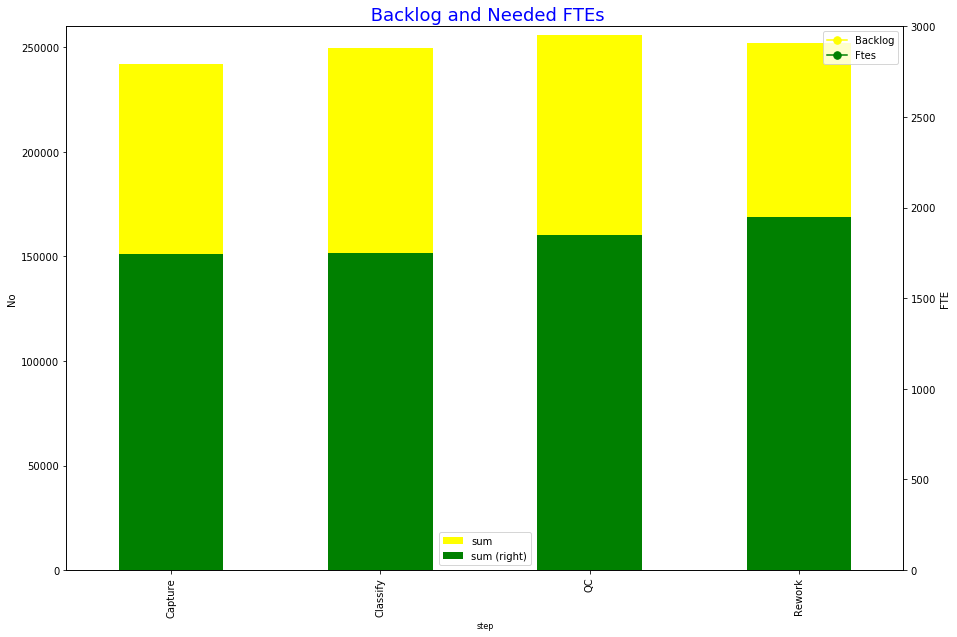

In [115]:
p2= d_gb['backlog'].plot(kind='bar', figsize=(10,5), color='yellow')
p2.set_title(" Backlog and Needed FTEs" , fontsize=18, color='blue')
p2.set_xlabel("Steps", fontsize=8)
p2.set_ylabel("No", fontsize=10)
p2.set_ylim(0,260000)
p1 = d_gb['need_ftes'].plot(kind='bar', color='g', figsize=(15,10), ax=p2, secondary_y=True)
p1.set_xlabel("Steps", fontsize=8)
p1.set_ylabel("FTE", fontsize=10)
p1.set_ylim(0,3000)
import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='yellow', marker='.',
                          markersize=15, label='Backlog')
green_line = mlines.Line2D([], [], color='green', marker='.',
                          markersize=15, label='Ftes')
plt.legend(handles=[blue_line,green_line])


In [112]:
step = 'Capture'
d_gb_step = d[d['step']==step].groupby(['project_name','step'])['need_ftes'].agg(['sum']).sort_values(by='sum',ascending=[False])
d_gb_step.head(n=10)

,,sum
project_name,step,
047_160519_MFM_GDA_Retrokonversion_MS,Capture,24.01
033_080419_MFM_Gewofag_Rechnung,Capture,23.42
026_160318_SAGA_505059,Capture,23.04
059_100630_SAGA_503367,Capture,22.86
057_170712_281_Korrespondenz,Capture,22.71
059_160714_Ancestry_43128_Sweden_Deaths,Capture,22.64
063_110630_V_01567_Volltext-Erfassung,Capture,22.62
015_120207_SAGA_503524,Capture,20.50
065_140422_SAGA_504757,Capture,20.41


In [104]:
def drawStatisticByStep(step, no_of_ele, color):
# group by step
    d_gb_step = d[d['step']==step].groupby(['project_name','step'])['need_ftes'].agg(['sum'])
# put values decribe
    db_des = d_gb_step.describe()
# sort
    db_des.sort_values(['sum'],ascending=[False], inplace=True)
    
    d_max_10 = db_des.nlargest(no_of_ele, 'sum')
    d_max_10.sort_values(['sum'],ascending=[False], inplace=True)
    # ax1 = d_max_10[['min','std','max']].plot(linestyle='-', marker='o')
    t = d_max_10.plot(kind='bar', figsize=(18,10), color=color)
    t.set_ylim(100,450);
    t.set_title(" Needed FTE for step " + str(step), fontsize=18, color='blue')
    t.set_xlabel("Project", fontsize=8)
    t.set_ylabel("Time (seconds)", fontsize=10)
  

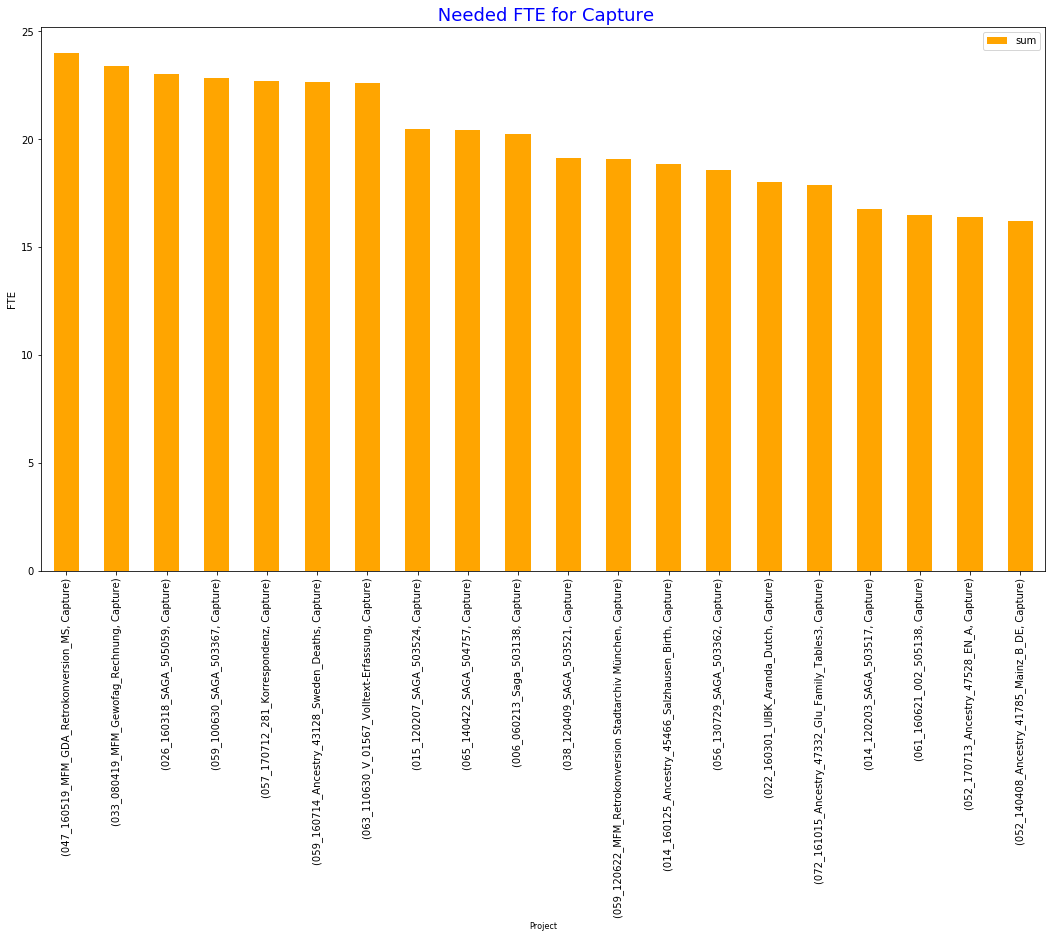

In [111]:
# drawStatisticByStep('Capture', 20, 'orange')
t = d_gb_step.nlargest(20, 'sum').plot(kind='bar', figsize=(18,10), color='orange', label='sumarize')
t.set_title(" Needed FTE for Capture" , fontsize=18, color='blue')
t.set_xlabel("Project", fontsize=8)
t.set_ylabel("FTE", fontsize=10)